In [1]:
library(data.table) #to read gz file
library(tidyverse)
library(CellChat)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  ma

In [2]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/cellchat/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.2.0     CellChat_2.1.2      Biobase_2.64.0     
 [4] BiocGenerics_0.50.0 igraph_2.0.3        lubridate_1.9.3    
 [7] forcats_1.0.0       stringr_1.5.1       dplyr_1.1.4        
[10] purrr

In [3]:
load("../build_customDB/CellChat_Custom/CellChatDB_custom.rda")

In [4]:
str(db.custom)

List of 4
 $ interaction:'data.frame':	6941 obs. of  9 variables:
  ..$ interaction_name  : chr [1:6941] "S100A10_TRPV6" "JAG2_NOTCH1" "DLL1_NOTCH1" "IGF1_IGF1R" ...
  ..$ pathway_name      : chr [1:6941] "" "" "" "" ...
  ..$ ligand            : chr [1:6941] "S100A10" "JAG2" "DLL1" "IGF1" ...
  ..$ receptor          : chr [1:6941] "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
  ..$ agonist           : chr [1:6941] "" "" "" "" ...
  ..$ antagonist        : chr [1:6941] "" "" "" "" ...
  ..$ co_A_receptor     : chr [1:6941] "" "" "" "" ...
  ..$ co_I_receptor     : chr [1:6941] "" "" "" "" ...
  ..$ interaction_name_2: chr [1:6941] "S100A10 - TRPV6" "JAG2 - NOTCH1" "DLL1 - NOTCH1" "IGF1 - IGF1R" ...
 $ complex    :'data.frame':	0 obs. of  0 variables
 $ cofactor   :'data.frame':	0 obs. of  0 variables
 $ geneInfo   : tibble [26,827 × 8] (S3: tbl_df/tbl/data.frame)
  ..$ EntryID.uniprot: chr [1:26827] "P04217" "Q9NQ94" "P01023" "A8K2U0" ...
  ..$ Symbol         : chr [1:26827] "A1BG" "A1CF" "A2M

In [5]:
CellChatDB.use <- db.custom

### Read in the expression data of interacting cells:
The dataset used here is publicly available single-cell data from Lasry, et al. 2022. The data was processed, filtered and normalized.

In [6]:
input_dir <- "../../../../../data_preprocessing/Lasry/2.filtering/outs/"
output_dir <- "outs/"

In [7]:
counts <- fread(paste0(input_dir,"counts_lognorm.csv.gz"), header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

'data.frame':	15770 obs. of  46702 variables:
 $ X2020.09.15.AML0024.CATCAAGGTTAGCGGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCAAGTCCGAGAAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCCACAGGGACCAT           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGAGCAAGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGTTCCATG           : num  0 0.993 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTAGAATAC           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTTCTCCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCCGAACGC           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCTAGTCAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACAAGACAGTCG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAATTGCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAGAACTAA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020

In [8]:
anno_cells <- read.table(paste0(input_dir,"anno_cells_norm.txt")
                         ,sep = "\t"
                         # ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

'data.frame':	46702 obs. of  92 variables:
 $ sample_ID                    : chr  "AML-0024" "AML-0024" "AML-0024" "AML-0024" ...
 $ cell                         : chr  "2020-09-15-AML0024:CATCAAGGTTAGCGGA" "2020-09-15-AML0024:CATCAAGTCCGAGAAG" "2020-09-15-AML0024:CATCCACAGGGACCAT" "2020-09-15-AML0024:CCTCAACAGAGCAAGA" ...
 $ UMAP_1                       : num  -0.731 -2.2 -2.867 -1.666 -0.972 ...
 $ UMAP_2                       : num  -15.8 -16.7 -16.1 -16.1 -17.5 ...
 $ orig.ident                   : chr  "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" ...
 $ samples                      : chr  "AML0024" "AML0024" "AML0024" "AML0024" ...
 $ Broad_cell_identity          : chr  "CD14+ monocyte" "CD14+ monocyte" "CD16+ monocyte" "CD14+ monocyte" ...
 $ Cell_type_identity           : chr  "CD14+ IFN+" "CD14+" "CD16+" "CD14+ IFN+" ...
 $ clusters_res.2               : int  7 7 7 7 80 7 7 7 7 7 ...
 $ CNV_pos                      : chr  "CNV+" "CNV+" "CN

In [9]:
rownames(anno_cells) <- anno_cells$cell_ID
colnames(counts) <- anno_cells$cell_ID

CellChat requires to be run on the each dataset (condition) separately and then merge different CellChat objects together.

Their documentation can be found in [here](https://htmlpreview.github.io/?https://github.com/jinworks/CellChat/blob/master/tutorial/Comparison_analysis_of_multiple_datasets.html)

In [10]:
sample_IDs <- unique(anno_cells$sample_ID)

In [11]:
counts.case.list <- list()
counts.control.list <- list()

anno.case.list <- list()
anno.control.list <- list()

In [12]:
for (sample_ID in sample_IDs) {
  # Subset annotation for the current sample_ID
  anno_subset <- anno_cells[anno_cells$sample_ID == sample_ID, ]
  
  # Get the cells (rownames of anno_subset)
  use.cells <- rownames(anno_subset)
  
  # Subset the count matrix for these cells
  counts_subset <- counts[, use.cells]
  
  # Append to the appropriate list based on the prefix of sample_ID
  if (startsWith(sample_ID, "AML")) {
    anno.case.list[[sample_ID]] <- anno_subset
    counts.case.list[[sample_ID]] <- counts_subset
  } else if (startsWith(sample_ID, "healthy")) {
    anno.control.list[[sample_ID]] <- anno_subset
    counts.control.list[[sample_ID]] <- counts_subset
  }
}

In [13]:
cellchat.case.list <- list()
cellchat.control.list <- list()

In [14]:
cell_types <- unique(anno_cells$cell_type)

In [15]:
dplyr::glimpse(CellChatDB.use$interaction)

Rows: 6,941
Columns: 9
$ interaction_name   <chr> "S100A10_TRPV6", "JAG2_NOTCH1", "DLL1_NOTCH1", "IGF…
$ pathway_name       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ ligand             <chr> "S100A10", "JAG2", "DLL1", "IGF1", "JAG1", "WNT5A",…
$ receptor           <chr> "TRPV6", "NOTCH1", "NOTCH1", "IGF1R", "NOTCH1", "FZ…
$ agonist            <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ antagonist         <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ interaction_name_2 <chr> "S100A10 - TRPV6", "JAG2 - NOTCH1", "DLL1 - NOTCH1"…


In [16]:
 names(counts.case.list)

[1] "AML-0024" "AML-0160" "AML-0693" "AML-1371" "AML-2123" "AML-3133" "AML-4340"

In [17]:
for (sample_ID in names(counts.case.list)) {
  # subset counts and annotation for AML samples
  counts_case <- counts.case.list[[sample_ID]]
  anno_case <- anno.case.list[[sample_ID]]
  counts_case <- data.matrix(counts_case)
  colnames(counts_case) <- rownames(anno_case)  
  # Create a CellChat object
  cellchat.case <- createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type")
  cellchat.case@DB <- CellChatDB.use
  # No need we can delete below

  

  cellchat.case.list[[sample_ID]] <- cellchat.case
}

# Same as above for the control
for (sample_ID in names(counts.control.list)) {
  # subset counts and annotation 
  counts_control <- counts.control.list[[sample_ID]]
  anno_control <- anno.control.list[[sample_ID]]
  counts_control <- data.matrix(counts_control)
  colnames(counts_control) <- rownames(anno_control)  
    
  cellchat.control <- createCellChat(object = counts_control, meta = anno_control, group.by = "cell_type")
  cellchat.control@DB <- CellChatDB.use

    
  # No need, we do this part later

  
  cellchat.control.list[[sample_ID]] <- cellchat.control
}

[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_case, meta = anno_case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts_control, meta = anno_control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 


In [18]:
options(future.globals.maxSize = 8000 * 1024^2)

To infer the cell state-specific communications, CellChat identifies over-expressed ligands or receptors in one cell group and then identifies over-expressed ligand-receptor interactions if either ligand or receptor are over-expressed.

In [19]:
future::plan("multisession", workers = 4)

In [20]:
for (sample_ID in names(cellchat.case.list)) {
 
  cellchat.case <- cellchat.case.list[[sample_ID]]
  
  # Run CellChat
  cellchat.case <- subsetData(cellchat.case) # Subset the data (necessary step)
  cellchat.case <- identifyOverExpressedGenes(cellchat.case) # Identify overexpressed genes
  cellchat.case <- identifyOverExpressedInteractions(cellchat.case, variable.both = FALSE) # identifyu overexpressed interactions
  
  
  cellchat.case.list[[sample_ID]] <- cellchat.case
}

# Same as above for the control
for (sample_ID in names(cellchat.control.list)) {
    
  cellchat.control <- cellchat.control.list[[sample_ID]]
  
  
  cellchat.control <- subsetData(cellchat.control) 
  cellchat.control <- identifyOverExpressedGenes(cellchat.control) 
  cellchat.control <- identifyOverExpressedInteractions(cellchat.control, variable.both = FALSE) 
  
  
  cellchat.control.list[[sample_ID]] <- cellchat.control
}

Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 2281 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 2216 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 2342 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 23

### Part II: Inference of cell-cell communication network
CellChat infers the biologically significant cell-cell communication by assigning each interaction with a probability value and peforming a permutation test. CellChat models the probability of cell-cell communication by integrating gene expression with prior known knowledge of the interactions between signaling ligands, receptors and their cofactors using the law of mass action.

### Compute the communication probability and infer cellular communication network

**CAUTION**

CAUTION: The number of inferred ligand-receptor pairs clearly depends on the method for calculating the average gene expression per cell group. By default, CellChat uses a statistically robust mean method called ‘trimean’, which produces fewer interactions than other methods.

Of note, ‘trimean’ approximates 25% truncated mean, implying that the average gene expression is zero if the percent of expressed cells in one group is less than 25%.

To use 10% truncated mean, USER can set type = "truncatedMean" and trim = 0.1

In [21]:
for (sample_ID in names(cellchat.case.list)) {
    cellchat.case <- cellchat.case.list[[sample_ID]]
    cellchat.case <- computeCommunProb(cellchat.case, type =  "truncatedMean", trim = 0.1)
    cellchat.case <- aggregateNet(cellchat.case)
    cellchat.case.list[[sample_ID]] <- cellchat.case
}

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:06:58.456073]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:08:26.738685]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:08:27.863539]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:09:20.111593]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:09:21.531589]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:10:23.894351]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [20

In [22]:
for (sample_ID in names(cellchat.control.list)) {
    cellchat.control <- cellchat.control.list[[sample_ID]]
    cellchat.control <- computeCommunProb(cellchat.control, type =  "truncatedMean", trim = 0.1)
    cellchat.control <- aggregateNet(cellchat.control)
    cellchat.control.list[[sample_ID]] <- cellchat.control
}

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:14:46.739717]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:15:48.918879]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:15:50.183415]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:16:55.613189]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-16 16:16:57.503232]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-16 16:18:09.858461]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [20

**Cell filter**

Users can filter out the cell-cell communication if there are only few cells in certain cell groups. By default, the minimum number of cells required in each cell group for cell-cell communication is 10.

In [23]:
# cellchat.case <- filterCommunication(cellchat.case, min.cells = 10)
# cellchat.control <- filterCommunication(cellchat.control, min.cells = 10)

### Calculate the aggregated cell-cell communication network
CellChat calculates the aggregated cell-cell communication network by counting the number of links or summarizing the communication probability. Users can also calculate the aggregated network among a subset of cell groups by setting sources.use and targets.use.

In [24]:
for (sample_ID in names(cellchat.case.list)) {
    
    cellchat <- cellchat.case.list[[sample_ID]]
    anno_case <- anno.case.list[[sample_ID]]

    if (!all(cell_types %in% anno_case$cell_type)) {
    # 
    cellchat <- liftCellChat(cellchat, cell_types)
  }
    
    cellchat.case.list[[sample_ID]] <- cellchat
}

The CellChat object will be lifted up using the cell labels Mono, Gran, T, NK, B, HSPC, Ery, DC



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels Mono, Gran, T, NK, B, HSPC, Ery, DC



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels Mono, Gran, T, NK, B, HSPC, Ery, DC



Update slots object@net, object@netP, object@idents in a single dataset... 


In [25]:
for (sample_ID in names(cellchat.control.list)) {
    
    cellchat <- cellchat.control.list[[sample_ID]]
    anno_control <- anno.control.list[[sample_ID]]

    if (!all(cell_types %in% anno_control$cell_type)) {
    # 
    cellchat <- liftCellChat(cellchat, cell_types)
  }
    
    cellchat.control.list[[sample_ID]] <- cellchat
}

In [26]:
object.list <- list("AML-0024" = cellchat.case.list[['AML-0024']], 'AML-0160' = cellchat.case.list[['AML-0160']], 'AML-0693' = cellchat.case.list[['AML-0693']], 
                    "AML-1371" = cellchat.case.list[['AML-1371']], "AML-2123" = cellchat.case.list[['AML-2123']], 
                    "AML-3133" = cellchat.case.list[['AML-3133']], "AML-4340" = cellchat.case.list[['AML-4340']],
                    "healthy-1" = cellchat.control.list[['healthy-1']], "healthy-2" = cellchat.control.list[['healthy-2']],
                    "healthy-3" = cellchat.control.list[['healthy-3']], 
                    "healthy-4" = cellchat.control.list[['healthy-4']], "healthy-4003" = cellchat.control.list[['healthy-4003']],
                    "healthy-5" = cellchat.control.list[['healthy-5']])

In [27]:
cellchat.merged <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [28]:
# Export the merged CellChat object and the list of the two separate objects for later use
save(cellchat.merged, file = "outs/cellchat.merged.RData")
save(object.list, file = "outs/object.list.RData")

In [2]:
load("outs/cellchat.merged.RData")
load("outs/object.list.RData")

### Compare the total number of interactions and interaction strength
To answer the question on whether the cell-cell communication is enhanced or not, CellChat compares the total number of interactions and interaction strength of the inferred cell-cell communication networks from different biological conditions.

In [30]:
# gg1 <- compareInteractions(cellchat.merged, show.legend = F, group = c(1,2))

In [31]:
# gg2 <- compareInteractions(cellchat.merged, show.legend = F, group = c(1,2), measure = "weight")

In [32]:
# gg1 + gg2

### Compare the number of interactions and interaction strength among different cell populations
To identify the interaction between which cell populations showing significant changes, CellChat compares the number of interactions and interaction strength among different cell populations using a circle plot with differential interactions (option A), a heatmap with differential interactions (option B) and two circle plots with the number of interactions or interaction strength per dataset (option C). Alternatively, users can examine the differential number of interactions or interaction strength among coarse cell types by aggregating the cell-cell communication based on the defined cell groups (option D).

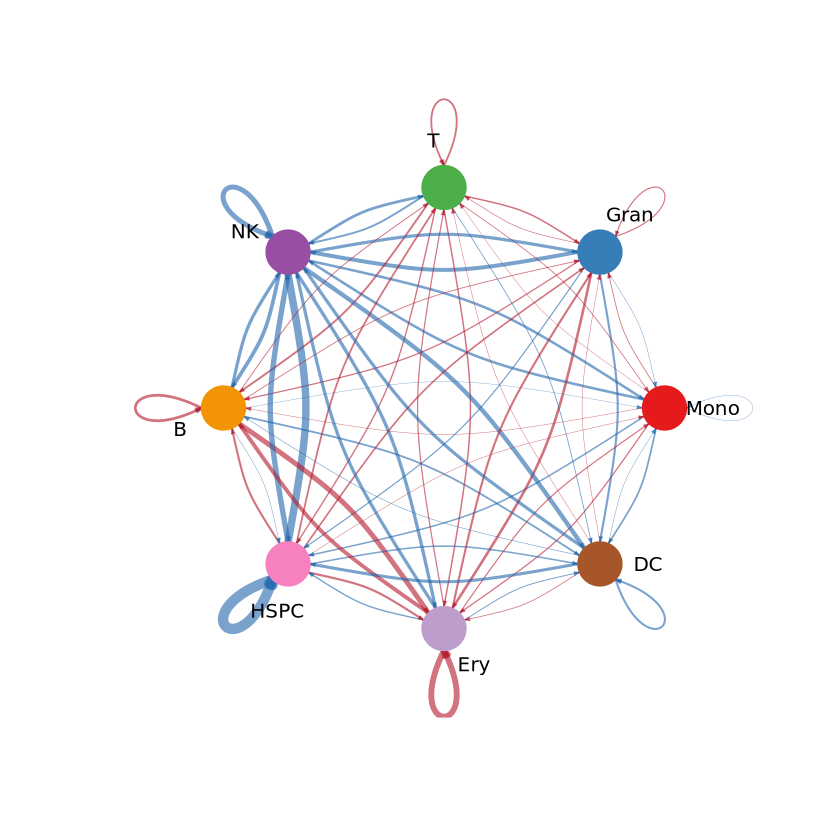

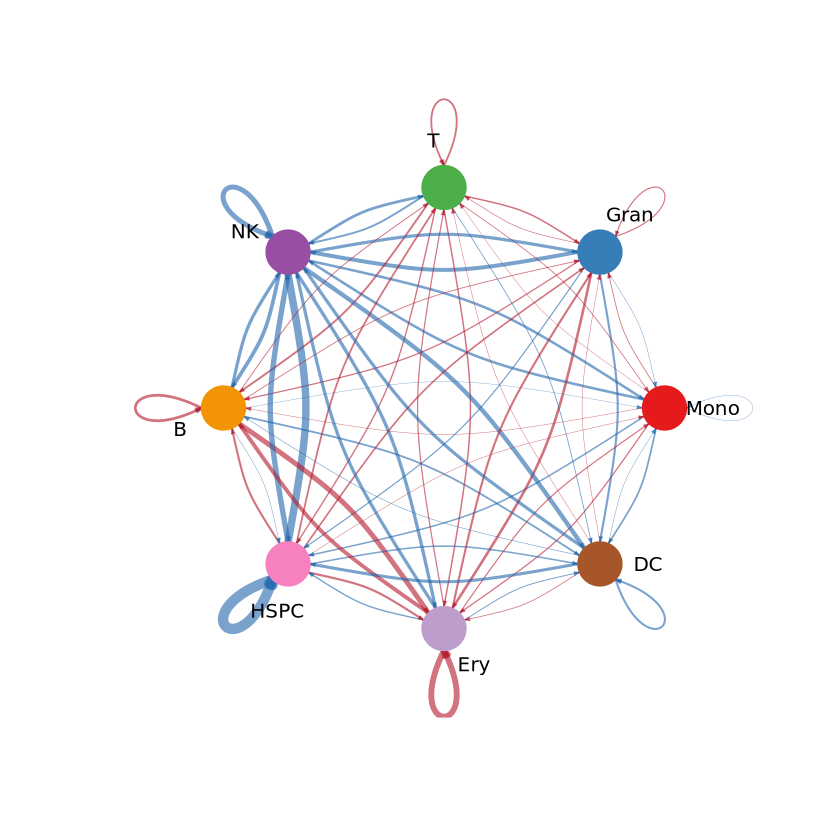

In [3]:
# (A) Circle plot showing differential number of interactions and 
# interaction strength among different cell populations across two datasets
netVisual_diffInteraction(cellchat.merged, weight.scale = T)

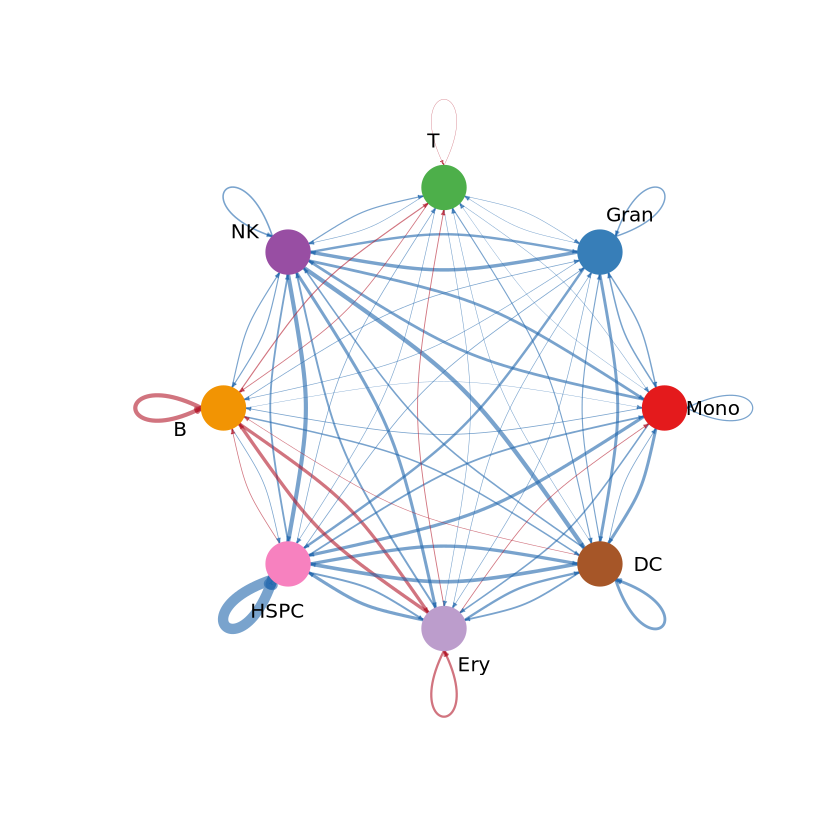

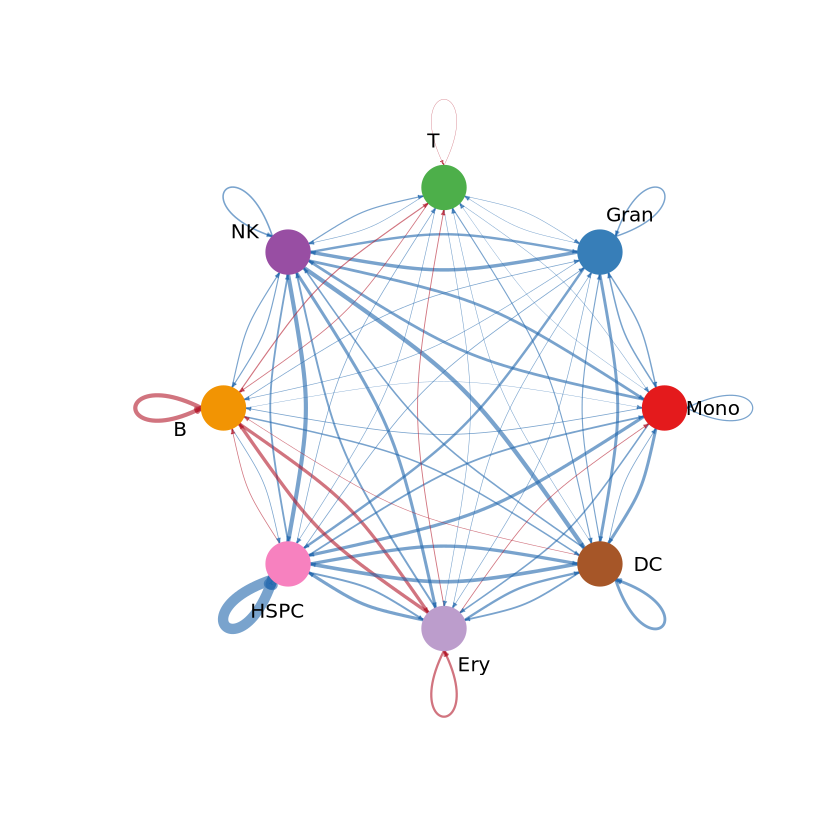

In [4]:
netVisual_diffInteraction(cellchat.merged, weight.scale = T, measure = "weight")

In [5]:
# Heatmap
gg1 <- netVisual_heatmap(cellchat.merged)

Do heatmap based on a merged object 




In [6]:
gg2 <- netVisual_heatmap(cellchat.merged, measure = "weight")

Do heatmap based on a merged object 




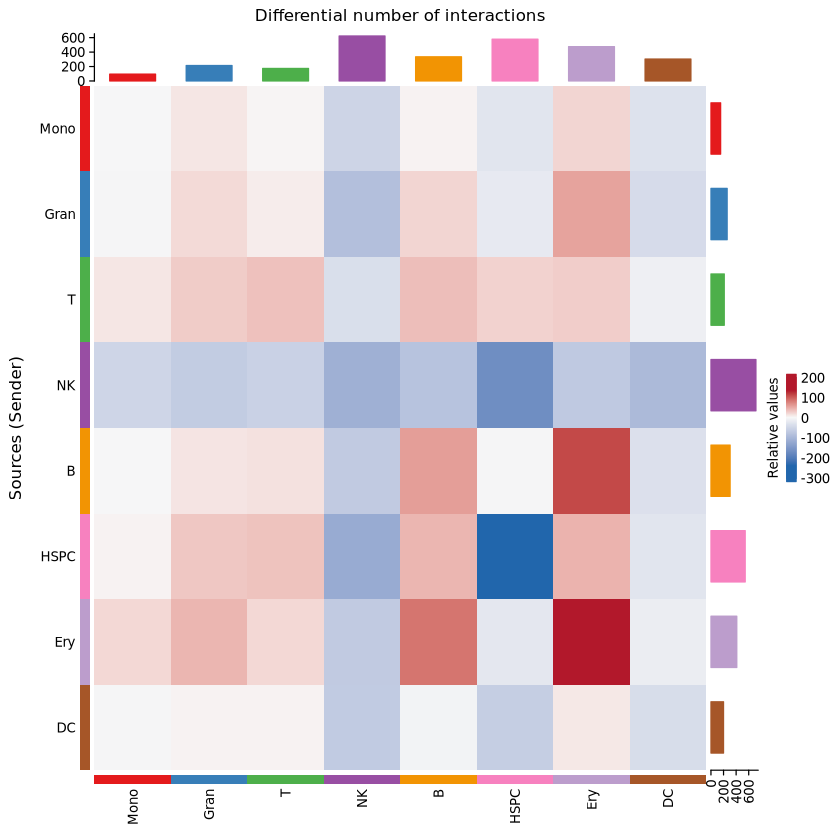

In [7]:
gg1

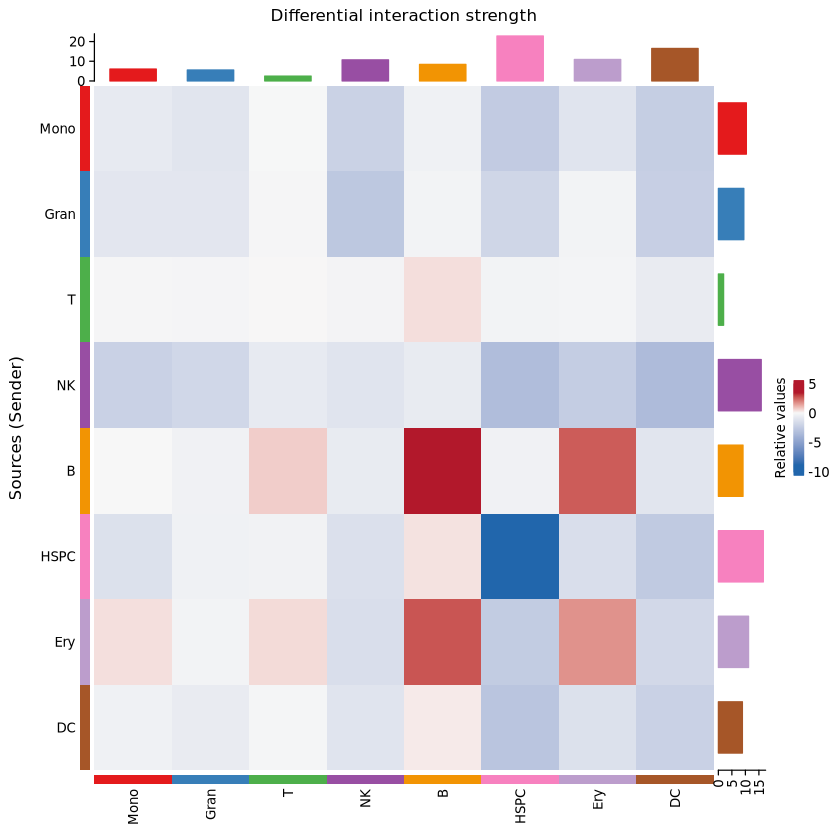

In [8]:
gg2

### Differential Interaction

In [9]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "AML"
# define a char name used for storing the results of differential expression analysis
features.name = paste0(pos.dataset, ".merged")

In [10]:
unique(cellchat.merged@meta$health_status)

[1] "AML"     "healthy"

In [11]:
# perform differential expression analysis 
# Of note, compared to CellChat version < v2, CellChat v2 now performs an ultra-fast Wilcoxon test using the presto package, 
# which gives smaller values of logFC. Thus we here set a smaller value of thresh.fc compared to the original one (thresh.fc = 0.1).
# Users can also provide a vector and dataframe of customized DEGs by modifying the cellchat@var.features$LS.merged and cellchat@var.features$LS.merged.info. 

cellchat.merged <- identifyOverExpressedGenes(cellchat.merged, group.dataset = "health_status", pos.dataset = pos.dataset, 
                                       features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, 
                                       do.fast = TRUE, min.cells=0, group.DE.combined = FALSE,return.object = TRUE)

Use the joint cell labels from the merged CellChat object



In [12]:
str(cellchat.merged@var.features)

List of 15
 $ AML-0024       :List of 2
  ..$ features     : chr [1:1002] "FCRL1" "MS4A1" "TNFRSF13B" "CD79A" ...
  ..$ features.info:'data.frame':	1581 obs. of  9 variables:
  .. ..$ features   : chr [1:1581] "FCRL1" "MS4A1" "TNFRSF13B" "CD79A" ...
  .. ..$ clusters   : chr [1:1581] "B" "B" "B" "B" ...
  .. ..$ avgExpr    : num [1:1581] 0.717 1.946 0.466 2.224 0.908 ...
  .. ..$ logFC      : num [1:1581] 0.716 1.942 0.466 2.221 0.906 ...
  .. ..$ auc        : num [1:1581] 0.689 0.913 0.629 0.939 0.758 ...
  .. ..$ pvalues    : num [1:1581] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ pvalues.adj: num [1:1581] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ pct.1      : num [1:1581] 37.9 82.8 25.9 87.9 51.7 ...
  .. ..$ pct.2      : num [1:1581] 0.115 0.313 0 0.346 0.181 ...
 $ AML-0160       :List of 2
  ..$ features     : chr [1:946] "CD79A" "RHAG" "CR1L" "ACKR1" ...
  ..$ features.info:'data.frame':	1267 obs. of  9 variables:
  .. ..$ features   : chr [1:1267] "CD79A" "RHAG" "CR1L" "ACKR1" ...
  .. ..$ cluste

In [13]:
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat.merged, features.name = features.name, variable.all = TRUE)

In [14]:
net$interaction_ID <- paste0(net$source, ":", net$ligand, "_", net$target, ":", net$receptor)

In [15]:
unique(net$datasets)

[1] "AML-0024"     "AML-0160"     "AML-0693"     "AML-1371"     "AML-2123"    
 [6] "AML-3133"     "AML-4340"     "healthy-1"    "healthy-2"    "healthy-3"   
[11] "healthy-4"    "healthy-4003" "healthy-5"

In [16]:
net[net$interaction_ID == "Mono:MIF_B:CD74",]

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,datasets,⋯,target.receptor,ligand.pvalues,ligand.logFC,ligand.pct.1,ligand.pct.2,receptor.pvalues,receptor.logFC,receptor.pct.1,receptor.pct.2,interaction_ID
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1875,Mono,B,MIF,CD74,0.19001587,0,MIF_CD74,MIF - CD74,,AML-0024,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
17142,Mono,B,MIF,CD74,0.19783699,0,MIF_CD74,MIF - CD74,,AML-1371,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
24835,Mono,B,MIF,CD74,0.11153474,0,MIF_CD74,MIF - CD74,,AML-2123,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
30483,Mono,B,MIF,CD74,0.16675926,0,MIF_CD74,MIF - CD74,,AML-3133,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
36345,Mono,B,MIF,CD74,0.07052127,0,MIF_CD74,MIF - CD74,,AML-4340,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
42820,Mono,B,MIF,CD74,0.12892926,0,MIF_CD74,MIF - CD74,,healthy-1,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
48526,Mono,B,MIF,CD74,0.14209053,0,MIF_CD74,MIF - CD74,,healthy-2,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
55439,Mono,B,MIF,CD74,0.13241255,0,MIF_CD74,MIF - CD74,,healthy-3,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74
64365,Mono,B,MIF,CD74,0.13023088,0,MIF_CD74,MIF - CD74,,healthy-4,⋯,B.CD74,3.788076e-39,0.188625,83.32927,67.5444,1.638037e-34,0.1513979,97.88779,98.30769,Mono:MIF_B:CD74


In [47]:
finfo <- cellchat.merged@var.features$`AML-0693`$`features.info`

In [48]:
finfo_mono <- finfo[finfo$cluster == "Mono",]

In [49]:
finfo_mono[finfo_mono$features == "MIF",]

features,clusters,avgExpr,logFC,auc,pvalues,pvalues.adj,pct.1,pct.2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [50]:
finfo_mono[finfo_mono$features == "CD74",]

,features,clusters,avgExpr,logFC,auc,pvalues,pvalues.adj,pct.1,pct.2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2900,CD74,Mono,2.238197,0.4443285,0.5722215,0.0001487578,0.0004927112,82.27848,63.89602


In [17]:
net_significant <- net %>%
  filter(ligand.pvalues < 0.1 | receptor.pvalues < 0.1)

In [18]:
nrow(net)

[1] 82044

In [19]:
nrow(net_significant)

[1] 74644

In [20]:
# upregulated ligands in LS
# subsetCommunication(cellchat, net = net, datasets = "LS",ligand.logFC = 0.05, receptor.logFC = NULL)

In [21]:
# upregulated ligands and upregulated receptors in NL, downregulated in LS
# subsetCommunication(cellchat, net = net, datasets = "NL",ligand.logFC = -0.05, receptor.logFC = NULL)

### Note on Identifying Upregulated and Downregulated Interactions

According to the documentation and a clarification provided in the CellChat [GitHub issues](https://github.com/jinworks/CellChat/issues/30), the process for identifying upregulated and downregulated interactions between two conditions (e.g., Condition A and Condition B) is as follows:

**Upregulated Interactions in Condition B Compared to Condition A:**
 - To identify interactions that are upregulated in Condition B (e.g., AML) relative to Condition A (e.g., healthy), we use positive log fold change (logFC) values when filtering for both ligands and receptors in Condition B:

```R
net.up <- subsetCommunication(cellchat, net = net, datasets = "condB", ligand.logFC = 0.2, receptor.logFC = 0.2)
```

**Downregulated Interactions in Condition B Compared to Condition A:**


note from their documentation

extract the ligand-receptor pairs with upregulated ligands in LS
```R
net.up <- subsetCommunication(cellchat, net = net, datasets = "LS",ligand.logFC = 0.05, receptor.logFC = NULL)
```
extract the ligand-receptor pairs with upregulated ligands and upregulated receptors in NL, i.e.,downregulated in LS
```R
net.down <- subsetCommunication(cellchat, net = net, datasets = "NL",ligand.logFC = -0.05, receptor.logFC = NULL)```

In [22]:
ligand_upregulated <- subsetCommunication(
  object = cellchat.merged,
  net = net_significant,
  datasets = grep("AML", cellchat.merged@meta$datasets, value = TRUE),
  ligand.logFC = 0.25
)

receptor_upregulated <- subsetCommunication(
  object = cellchat.merged,
  net = net_significant,
  datasets = grep("AML", cellchat.merged@meta$datasets, value = TRUE),
  receptor.logFC = 0.25
)

In [23]:
upregulated <- rbind(ligand_upregulated,receptor_upregulated)
upregulated$interaction_ID <- paste0(upregulated$source, ":", upregulated$ligand, "_", upregulated$target, ":", upregulated$receptor)

In [24]:
upregulated_nr <- upregulated[!duplicated(upregulated$interaction_ID),]

In [25]:
ligand_downregulated <- subsetCommunication(
  object = cellchat.merged,
  net = net_significant,
  datasets = grep("healthy", cellchat.merged@meta$datasets, value = TRUE),
  ligand.logFC = -0.25
)

receptor_downregulated <- subsetCommunication(
  object = cellchat.merged,
  net = net_significant,
  datasets = grep("healthy", cellchat.merged@meta$datasets, value = TRUE),
  receptor.logFC = -0.25
)

In [26]:
downregulated <- rbind(ligand_downregulated,receptor_downregulated)
downregulated$interaction_ID <- paste0(downregulated$source, ":", downregulated$ligand, "_", downregulated$target, ":", downregulated$receptor)

In [27]:
# downregulated$ligand.logFC <- -(downregulated$ligand.logFC)

In [28]:
# downregulated$receptor.logFC <- -(downregulated$receptor.logFC)

In [29]:
nrow(upregulated)

[1] 9244

In [30]:
nrow(downregulated)

[1] 9381

In [31]:
nrow(upregulated[upregulated$interaction_ID %in% downregulated$interaction_ID,])

[1] 752

In [32]:
corresponding_pairs <- upregulated[upregulated$interaction_ID %in% downregulated$interaction_ID,]

In [33]:
differential_interactions <- rbind(upregulated, downregulated)

In [34]:
differential_interactions$direction_lig <- NA
differential_interactions$direction_rec <- NA

differential_interactions$direction_lig[!is.na(differential_interactions$ligand.logFC) & (differential_interactions$ligand.logFC < 0)] <- "down"
differential_interactions$direction_lig[!is.na(differential_interactions$ligand.logFC) & (differential_interactions$ligand.logFC > 0)] <- "up"

differential_interactions$direction_rec[!is.na(differential_interactions$receptor.logFC) & (differential_interactions$receptor.logFC < 0)] <- "down"
differential_interactions$direction_rec[!is.na(differential_interactions$receptor.logFC) & (differential_interactions$receptor.logFC > 0)] <- "up"

differential_interactions$direction_lig_rec <- paste(differential_interactions$direction_lig
                                            ,differential_interactions$direction_rec
                                            ,sep = "_")

idx_down <- (differential_interactions$direction_lig_rec == "down_NA") | (
    differential_interactions$direction_lig_rec == "NA_down") | (
    differential_interactions$direction_lig_rec == "down_down")
idx_up <- (differential_interactions$direction_lig_rec == "up_NA") | (
    differential_interactions$direction_lig_rec == "NA_up") | (
    differential_interactions$direction_lig_rec == "up_up")

differential_interactions$direction <- NA
differential_interactions$direction[idx_down] <- "down"
differential_interactions$direction[idx_up] <- "up"
differential_interactions$direction[!(idx_down | idx_up)] <- "ambigous"

In [35]:
differential_interactions[differential_interactions$interaction_ID == "Gran:LGALS1_B:CD69",]

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,datasets,⋯,ligand.pvalues,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,interaction_ID,direction_lig,direction_rec,direction_lig_rec,direction
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
5387,Gran,B,LGALS1,CD69,0.24803176,0,LGALS1_CD69,LGALS1 - CD69,,AML-0024,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
6094,Gran,B,LGALS1,CD69,0.01679839,0,LGALS1_CD69,LGALS1 - CD69,,AML-0693,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
6878,Gran,B,LGALS1,CD69,0.09260765,0,LGALS1_CD69,LGALS1 - CD69,,AML-1371,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
8127,Gran,B,LGALS1,CD69,0.12895197,0,LGALS1_CD69,LGALS1 - CD69,,AML-3133,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
9257,Gran,B,LGALS1,CD69,0.17346488,0,LGALS1_CD69,LGALS1 - CD69,,healthy-1,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
10150,Gran,B,LGALS1,CD69,0.17268163,0,LGALS1_CD69,LGALS1 - CD69,,healthy-2,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
10952,Gran,B,LGALS1,CD69,0.07641443,0,LGALS1_CD69,LGALS1 - CD69,,healthy-3,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
12153,Gran,B,LGALS1,CD69,0.01697973,0,LGALS1_CD69,LGALS1 - CD69,,healthy-4,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous
13390,Gran,B,LGALS1,CD69,0.03005540,0,LGALS1_CD69,LGALS1 - CD69,,healthy-4003,⋯,9.453065e-69,0.7384087,54.12541,27.41538,3.331284e-89,Gran:LGALS1_B:CD69,down,up,down_up,ambigous


In [36]:
nrow(differential_interactions[differential_interactions$direction=="up",])

[1] 7031

In [37]:
nrow(differential_interactions[differential_interactions$direction=="down",])

[1] 5710

In [38]:
nrow(differential_interactions[differential_interactions$direction=="ambigous",])

[1] 5884

In [39]:
differential_interactions$average_logFC <- (differential_interactions$ligand.logFC + differential_interactions$receptor.logFC) / 2

In [40]:
head(differential_interactions)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,datasets,⋯,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,interaction_ID,direction_lig,direction_rec,direction_lig_rec,direction,average_logFC
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,NK,NK,TGFB1,TGFBR3,0.0069939380,0.00,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0024,⋯,0.23734084,37.56382,16.344464,4.306009e-26,NK:TGFB1_NK:TGFBR3,up,up,up_up,up,0.4318757
2,T,NK,TGFB1,TGFBR3,0.0059918655,0.00,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0024,⋯,0.23734084,37.56382,16.344464,4.306009e-26,T:TGFB1_NK:TGFBR3,up,up,up_up,up,0.3743089
3,NK,T,TGFB1,TGFBR3,0.0009408477,0.00,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0024,⋯,0.12189424,21.31395,9.601422,1.226208e-58,NK:TGFB1_T:TGFBR3,up,up,up_up,up,0.3741524
4,T,T,TGFB1,TGFBR3,0.0008053422,0.00,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0024,⋯,0.12189424,21.31395,9.601422,1.226208e-58,T:TGFB1_T:TGFBR3,up,up,up_up,up,0.3165856
5,Mono,DC,ADM,RAMP1,0.0100074770,0.01,ADM_RAMP1,ADM - RAMP1,,AML-0024,⋯,NA,NA,NA,NA,Mono:ADM_DC:RAMP1,up,NA,up_NA,up,NA
6,Mono,NK,ADM,RAMP1,0.0055381506,0.00,ADM_RAMP1,ADM - RAMP1,,AML-0024,⋯,0.04407241,10.50328,5.799649,1.082254e-05,Mono:ADM_NK:RAMP1,up,up,up_up,up,0.4000012


In [41]:
weights_df <- data.frame(matrix(nrow = length(unique(differential_interactions$interaction_ID)),
                            ncol = length(unique(differential_interactions$datasets))))
rownames(weights_df) <- unique(differential_interactions$interaction_ID)
colnames(weights_df) <- unique(differential_interactions$datasets)

In [42]:
for (i in 1:nrow(differential_interactions)) {
  interaction_id <- differential_interactions$interaction_ID[i]
  sample_ID <- differential_interactions$datasets[i]
  weight <- differential_interactions$prob[i]
  
  weights_df[interaction_id, grep(sample_ID, colnames(weights_df))] <- weight
}

In [43]:
head(weights_df)

,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NK:TGFB1_NK:TGFBR3,0.0069939380,NA,0.007884556,0.03626334,NA,0.018647469,NA,NA,NA,NA,NA,NA,NA
T:TGFB1_NK:TGFBR3,0.0059918655,NA,0.001992708,0.02866503,NA,0.011366258,NA,NA,NA,NA,NA,NA,NA
NK:TGFB1_T:TGFBR3,0.0009408477,NA,NA,0.01429447,NA,0.001715363,NA,NA,NA,NA,NA,NA,NA
T:TGFB1_T:TGFBR3,0.0008053422,NA,NA,0.01124562,NA,0.001038575,NA,NA,NA,NA,NA,NA,NA
Mono:ADM_DC:RAMP1,0.0100074770,5.467536e-05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Mono:ADM_NK:RAMP1,0.0055381506,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [45]:
differential_interactions[differential_interactions$interaction_ID == "NK:TGFB1_NK:TGFBR3",]

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,datasets,⋯,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,interaction_ID,direction_lig,direction_rec,direction_lig_rec,direction,average_logFC
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,NK,NK,TGFB1,TGFBR3,0.006993938,0,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0024,⋯,0.2373408,37.56382,16.34446,4.306009e-26,NK:TGFB1_NK:TGFBR3,up,up,up_up,up,0.4318757
831,NK,NK,TGFB1,TGFBR3,0.007884556,0,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-0693,⋯,0.2373408,37.56382,16.34446,4.306009e-26,NK:TGFB1_NK:TGFBR3,up,up,up_up,up,0.4318757
1904,NK,NK,TGFB1,TGFBR3,0.036263339,0,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-1371,⋯,0.2373408,37.56382,16.34446,4.306009e-26,NK:TGFB1_NK:TGFBR3,up,up,up_up,up,0.4318757
3870,NK,NK,TGFB1,TGFBR3,0.018647469,0,TGFB1_TGFBR3,TGFB1 - TGFBR3,,AML-3133,⋯,0.2373408,37.56382,16.34446,4.306009e-26,NK:TGFB1_NK:TGFBR3,up,up,up_up,up,0.4318757


In [46]:
differential_interactions <- differential_interactions[!duplicated(differential_interactions$interaction_ID),]

In [47]:
differential_interactions <- differential_interactions %>%
  rename(
    sending_celltype = source,
    receiving_celltype = target,
    sender_gene = ligand,
    receiving_gene = receptor
  )

In [48]:
cellchat_interactions <- list()

In [49]:
cellchat_interactions$weights <- weights_df
cellchat_interactions$anno_interactions <- differential_interactions

In [50]:
write.csv(net_significant,"outs/CellChat_significant.csv")
save(cellchat_interactions, file = "outs/cellchat_interactions.RData")

In [51]:
differential_interactions[differential_interactions$interaction_name == "HMGB1_CXCR4" & differential_interactions$sending_celltype=="Mono",]

,sending_celltype,receiving_celltype,sender_gene,receiving_gene,prob,pval,interaction_name,interaction_name_2,pathway_name,datasets,⋯,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,interaction_ID,direction_lig,direction_rec,direction_lig_rec,direction,average_logFC
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5744,Mono,B,HMGB1,CXCR4,0.15274374,0.00,HMGB1_CXCR4,HMGB1 - CXCR4,,AML-0024,⋯,0.6204654,75.24752,59.32308,1.585958e-73,Mono:HMGB1_B:CXCR4,down,up,down_up,ambigous,0.24539818
5764,Mono,NK,HMGB1,CXCR4,0.14200036,0.00,HMGB1_CXCR4,HMGB1 - CXCR4,,AML-0024,⋯,1.0763596,82.12983,34.38781,1.643696e-132,Mono:HMGB1_NK:CXCR4,down,up,down_up,ambigous,0.47334530
5772,Mono,T,HMGB1,CXCR4,0.14975782,0.00,HMGB1_CXCR4,HMGB1 - CXCR4,,AML-0024,⋯,1.1337120,88.89938,51.77063,0.000000e+00,Mono:HMGB1_T:CXCR4,down,up,down_up,ambigous,0.50202150
6022,Mono,Mono,HMGB1,CXCR4,0.14516760,0.00,HMGB1_CXCR4,HMGB1 - CXCR4,,AML-0160,⋯,0.5937561,73.77529,36.94632,0.000000e+00,Mono:HMGB1_Mono:CXCR4,down,up,down_up,ambigous,0.23204355
6029,Mono,Gran,HMGB1,CXCR4,0.07718229,0.01,HMGB1_CXCR4,HMGB1 - CXCR4,,AML-0160,⋯,0.3176356,72.54335,54.94590,9.577429e-21,Mono:HMGB1_Gran:CXCR4,down,up,down_up,ambigous,0.09398329
